In [1]:
from xarrayMannKendall import Mann_Kendall_test

In [2]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatch
import matplotlib.patches as patches
from matplotlib.transforms import offset_copy
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import statsmodels.api as sm
import xarray as xr
import scipy.stats as sstats
from cmcrameri import cm
import cartopy.crs as ccrs
from cartopy.io import shapereader
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from itertools import count
import itertools

In [3]:
mswep_ctrb = xr.open_dataset("mswep_ct_river_basin1.nc")
mswep_ctrb

<xarray.Dataset>
Dimensions:        (lat: 40, lon: 21, time: 15339)
Coordinates:
  * lat            (lat) float32 45.25 45.15 45.05 44.95 ... 41.55 41.45 41.35
  * lon            (lon) float32 -73.15 -73.05 -72.95 ... -71.35 -71.25 -71.15
  * time           (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2020-12-30
    spatial_ref    int32 ...
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    history:  Created on 2021-02-03 20:47

### 2nd Figure

In [36]:
# extreme precipitation

mswep_extreme = mswep_ctrb.groupby("time.year").quantile(0.99)
mswep_extreme

C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<xarray.Dataset>
Dimensions:        (lat: 40, lon: 21, year: 42)
Coordinates:
  * lat            (lat) float32 45.25 45.15 45.05 44.95 ... 41.55 41.45 41.35
  * lon            (lon) float32 -73.15 -73.05 -72.95 ... -71.35 -71.25 -71.15
    quantile       float64 0.99
  * year           (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Data variables:
    precipitation  (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [37]:
"""
# Example data
da = xr.DataArray(np.random.randn(20, 180, 360),
                  dims=('time', 'lat', 'lon'),
                  coords={'time': np.linspace(0,19, 20), 
                  'lat': np.linspace(-90,90,180), 
                  'lon': np.linspace(0,359, 360)})
"""
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    pf = np.polyfit(x.year, x, 1)
    # need to return an xr.DataArray for groupby
    return xr.DataArray(pf[0]*10)

# stack lat and lon into a single dimension called allpoints
stacked = mswep_extreme.precipitation.stack(allpoints=['lat','lon'])
stacked = stacked.fillna(0)
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')

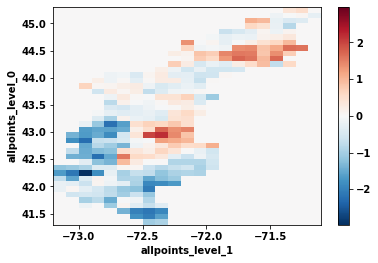

In [35]:
trend_unstacked.plot()

In [4]:
# do the same but now seasonaly

mswep_winter = mswep_ctrb.sel(time=mswep_ctrb.time.dt.season=="DJF")
mswep_winter_extreme = mswep_winter.groupby("time.year").quantile(0.99)

mswep_spring = mswep_ctrb.sel(time=mswep_ctrb.time.dt.season=="MAM")
mswep_spring_extreme = mswep_spring.groupby("time.year").quantile(0.99)

mswep_summer = mswep_ctrb.sel(time=mswep_ctrb.time.dt.season=="JJA")
mswep_summer_extreme = mswep_summer.groupby("time.year").quantile(0.99)

mswep_fall = mswep_ctrb.sel(time=mswep_ctrb.time.dt.season=="SON")
mswep_fall_extreme = mswep_fall.groupby("time.year").quantile(0.99)

C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\panmits86\Anaconda3\envs\unidata\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [5]:
"""
# Example data
da = xr.DataArray(np.random.randn(20, 180, 360),
                  dims=('time', 'lat', 'lon'),
                  coords={'time': np.linspace(0,19, 20), 
                  'lat': np.linspace(-90,90,180), 
                  'lon': np.linspace(0,359, 360)})
"""
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    pf = np.polyfit(x.year, x, 1)
    # need to return an xr.DataArray for groupby
    return xr.DataArray(pf[0]*10)

# stack lat and lon into a single dimension called allpoints
stacked = mswep_winter_extreme.precipitation.stack(allpoints=['lat','lon'])
stacked = stacked.fillna(0)
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_winter = trend.unstack('allpoints')
trend_unstacked_winter = trend_unstacked_winter.rename({'dim_0': 'trend', 'allpoints_level_0': 'lat','allpoints_level_1': 'lon'})
trend_unstacked_winter = trend_unstacked_winter.where(trend_unstacked_winter[0] != 0.)

stacked = mswep_spring_extreme.precipitation.stack(allpoints=['lat','lon'])
stacked = stacked.fillna(0)
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_spring = trend.unstack('allpoints')
trend_unstacked_spring = trend_unstacked_spring.rename({'dim_0': 'trend', 'allpoints_level_0': 'lat','allpoints_level_1': 'lon'})
trend_unstacked_spring = trend_unstacked_spring.where(trend_unstacked_spring[0] != 0.)

stacked = mswep_summer_extreme.precipitation.stack(allpoints=['lat','lon'])
stacked = stacked.fillna(0)
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_summer = trend.unstack('allpoints')
trend_unstacked_summer = trend_unstacked_summer.rename({'dim_0': 'trend', 'allpoints_level_0': 'lat','allpoints_level_1': 'lon'})
trend_unstacked_summer = trend_unstacked_summer.where(trend_unstacked_summer[0] != 0.)

stacked = mswep_fall_extreme.precipitation.stack(allpoints=['lat','lon'])
stacked = stacked.fillna(0)
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked_fall = trend.unstack('allpoints')
trend_unstacked_fall = trend_unstacked_fall.rename({'dim_0': 'trend', 'allpoints_level_0': 'lat','allpoints_level_1': 'lon'})
trend_unstacked_fall = trend_unstacked_fall.where(trend_unstacked_fall[0] != 0.)

In [61]:
trend_unstacked_spring.min(), trend_unstacked_fall.max()

(<xarray.DataArray ()>
 array(-5.0541113),
 <xarray.DataArray ()>
 array(4.47068208))

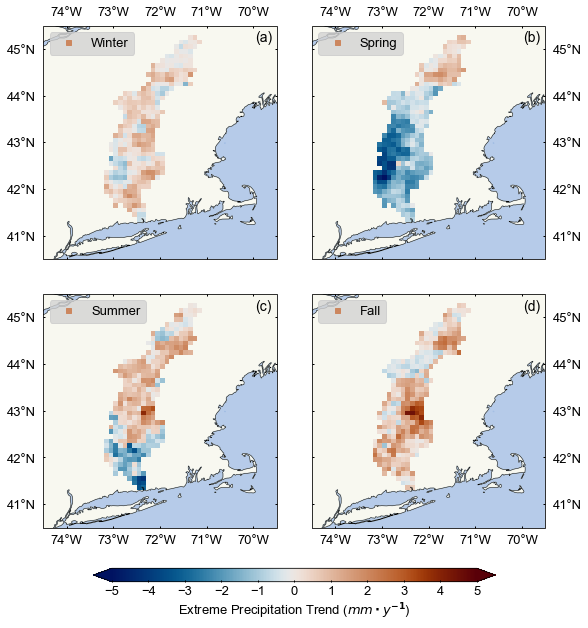

In [96]:
fig, ax_lst = plt.subplots(2, 2, figsize=(9,12.5), subplot_kw=dict(projection=ccrs.PlateCarree()), 
                           gridspec_kw={'hspace': 0.0, 'wspace': 0.15})

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 13

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1.),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

cmap = cm.vik
#cmap = cm.batlow

bounds = np.array([-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.])
min_lon = -74.5
max_lon = -69.5
min_lat = 40.5
max_lat = 45.5

lon_ticks = [-74, -73, -72, -71, -70]
lat_ticks = [41, 42, 43, 44, 45]


# Figure 1

ax_lst[0,0].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[0,0].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[0,0].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[0,0].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[0,0].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[0,0].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[0,0].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[0,0].tick_params(labelleft=True,labelbottom=False,labeltop=True,labelright=False)  

ax_lst[0,0].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[0,0].coastlines(resolution='10m',linewidth=0.5)
#ax_lst[0,0].add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5,alpha=0.8)
ax_lst[0,0].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[0,0].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(trend_unstacked_winter.lon,trend_unstacked_winter.lat)

cs2 = ax_lst[0,0].pcolormesh(lon, lat, trend_unstacked_winter[0], vmin=-5.,vmax=5., 
                             cmap=cmap)
#.where(notnull)
cax,kw = mpl.colorbar.make_axes(ax_lst,location='bottom',pad=0.06,aspect=30, shrink=0.8)
out=fig.colorbar(cs2, cax=cax, ticks=bounds,extend='both',**kw)
out.set_label('Extreme Precipitation Trend ($mm \cdot y^{-1}$)')
out.ax.tick_params(direction='in',size=2., width=1)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Winter',
                          markerfacecolor=cmap(0.7),markeredgecolor=cmap(0.7), markersize=5)
                  
ax_lst[0,0].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 2


ax_lst[0,1].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[0,1].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[0,1].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[0,1].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[0,1].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[0,1].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[0,1].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[0,1].tick_params(labelleft=False,labelbottom=False,labeltop=True,labelright=True)  

ax_lst[0,1].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[0,1].coastlines(resolution='10m',linewidth=0.5)
ax_lst[0,1].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[0,1].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(trend_unstacked_spring.lon,trend_unstacked_spring.lat)

cs2 = ax_lst[0,1].pcolormesh(lon, lat, trend_unstacked_spring[0], vmin=-5.,vmax=5., 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Spring',
                          markerfacecolor=cmap(0.7),markeredgecolor=cmap(0.7), markersize=5)
                  
ax_lst[0,1].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 3

ax_lst[1,0].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[1,0].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[1,0].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[1,0].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[1,0].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[1,0].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[1,0].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[1,0].tick_params(labelleft=True,labelbottom=True,labeltop=False,labelright=False)  

ax_lst[1,0].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[1,0].coastlines(resolution='10m',linewidth=0.5)
ax_lst[1,0].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[1,0].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(trend_unstacked_summer.lon,trend_unstacked_summer.lat)

cs2 = ax_lst[1,0].pcolormesh(lon, lat, trend_unstacked_summer[0], vmin=-5.,vmax=5., 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Summer',
                          markerfacecolor=cmap(0.7),markeredgecolor=cmap(0.7), markersize=5)
                  
ax_lst[1,0].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 4

ax_lst[1,1].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[1,1].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[1,1].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[1,1].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[1,1].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[1,1].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[1,1].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[1,1].tick_params(labelleft=False,labelbottom=True,labeltop=False,labelright=True)  

ax_lst[1,1].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[1,1].coastlines(resolution='10m',linewidth=0.5)
ax_lst[1,1].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[1,1].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(trend_unstacked_fall.lon,trend_unstacked_fall.lat)

cs2 = ax_lst[1,1].pcolormesh(lon, lat, trend_unstacked_fall[0], vmin=-5.,vmax=5., 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Fall',
                          markerfacecolor=cmap(0.7),markeredgecolor=cmap(0.7), markersize=5)
                  
ax_lst[1,1].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')

plt.savefig('seasonal_extreme_precipitation_allyears.png', format='png', transparent=False, dpi=600, bbox_inches='tight')

In [24]:
mswep_seasonal_mean = mswep_ctrb.groupby("time.season").mean()
mswep_seasonal_mean

<xarray.Dataset>
Dimensions:        (lat: 40, lon: 21, season: 4)
Coordinates:
  * lat            (lat) float32 45.25 45.15 45.05 44.95 ... 41.55 41.45 41.35
  * lon            (lon) float32 -73.15 -73.05 -72.95 ... -71.35 -71.25 -71.15
    spatial_ref    int32 0
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    precipitation  (season, lat, lon) float32 nan nan nan nan ... nan nan nan

### 1st Figure

2 panels: panel (a) shows the average total annual precipitation and panel (b) shows the trend in mm/decade

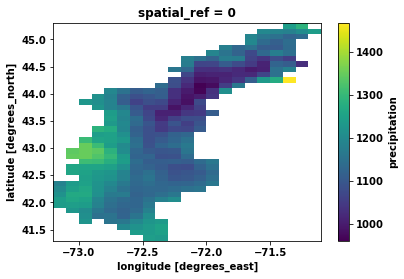

In [25]:
# calculate the total annual precipitation and the the mean total annual
mswep_yearly_sum = mswep_ctrb.groupby("time.year").sum('time')
mswep_yearly_sum_year = mswep_yearly_sum.mean('year')
mswep_yearly_sum_year = mswep_yearly_sum_year.where(mswep_yearly_sum_year.precipitation != 0.)
mswep_yearly_sum_year.precipitation.plot()

In [139]:
mswep_yearly_sum_year.precipitation.min(), mswep_yearly_sum_year.precipitation.max()

(<xarray.DataArray 'precipitation' ()>
 array(960.59820557)
 Coordinates:
     spatial_ref  int32 0,
 <xarray.DataArray 'precipitation' ()>
 array(1467.04614258)
 Coordinates:
     spatial_ref  int32 0)

In [97]:
# trend of annual total precipitation
mswep_yearly_sum = mswep_ctrb.groupby("time.year").sum('time')
mswep_yearly_sum

<xarray.Dataset>
Dimensions:        (lat: 40, lon: 21, year: 42)
Coordinates:
  * lat            (lat) float32 45.25 45.15 45.05 44.95 ... 41.55 41.45 41.35
  * lon            (lon) float32 -73.15 -73.05 -72.95 ... -71.35 -71.25 -71.15
    spatial_ref    int32 0
  * year           (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Data variables:
    precipitation  (year, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [100]:
"""
# Example data
da = xr.DataArray(np.random.randn(20, 180, 360),
                  dims=('time', 'lat', 'lon'),
                  coords={'time': np.linspace(0,19, 20), 
                  'lat': np.linspace(-90,90,180), 
                  'lon': np.linspace(0,359, 360)})
"""
# define a function to compute a linear trend of a timeseries
def linear_trend(x):
    pf = np.polyfit(x.year, x, 1)
    # need to return an xr.DataArray for groupby
    return xr.DataArray(pf[0]*10)

# stack lat and lon into a single dimension called allpoints
stacked = mswep_yearly_sum.precipitation.stack(allpoints=['lat','lon'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')
trend_unstacked = trend_unstacked.rename({'dim_0': 'trend', 'allpoints_level_0': 'lat','allpoints_level_1': 'lon'})
trend_unstacked = trend_unstacked.where(trend_unstacked[0] != 0.)

In [156]:
trend_unstacked.max().values, trend_unstacked.min().values

(array(70.5063913), array(-19.94348108))

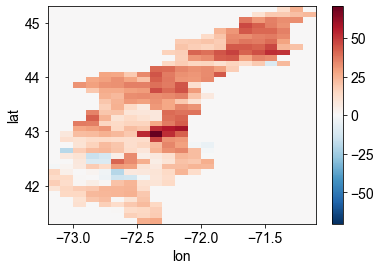

In [151]:
trend_unstacked.plot()

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_15228/4140068856.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


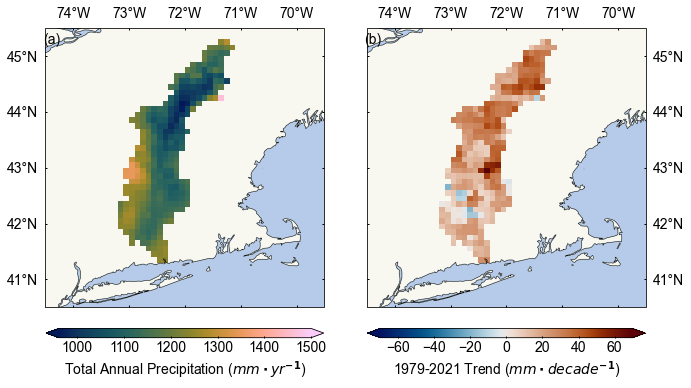

In [103]:
fig, ax_lst = plt.subplots(1, 2,figsize=(11., 6.5), subplot_kw=dict(projection=ccrs.PlateCarree()),
                                                                    gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (0.07, 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

cmap = cm.batlow
cmap2 = cm.vik

bounds = np.array([1000, 1100, 1200, 1300, 1400., 1500.])
bounds2 = np.array([-60.,-40.,-20.,0,20.,40.,60.])

lon_ticks = [-74, -73, -72, -71, -70]
lat_ticks = [41, 42, 43, 44, 45]

# Figure 1

ax_lst[0].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[0].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[0].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[0].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[0].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[0].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[0].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[0].tick_params(labelleft=True,labelbottom=False,labeltop=True,labelright=False)  

ax_lst[0].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)
#ax_lst[0].add_feature(cfeature.STATES, linewidth=0.4)

ax_lst[0].coastlines(resolution='10m',linewidth=0.5)
#ax_lst[0,0].add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5,alpha=0.8)
ax_lst[0].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[0].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(mswep_yearly_sum_year.lon,mswep_yearly_sum_year.lat)

cs2 = ax_lst[0].pcolormesh(lon, lat, mswep_yearly_sum_year.precipitation, vmin=960.,vmax=1500., 
                             cmap=cmap)
#.where(notnull)
cax,kw = mpl.colorbar.make_axes(ax_lst[0],location='bottom',pad=0.06,aspect=30, shrink=0.95)
out=fig.colorbar(cs2, cax=cax, ticks=bounds,extend='both',**kw)
out.set_label('Total Annual Precipitation ($mm \cdot yr^{-1}$)')
out.ax.tick_params(direction='in',size=2., width=1)

"""
precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Winter',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[0].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')
"""

# Figure 2

ax_lst[1].set_extent([-74.5, -69.5, 40.5, 45.5])
ax_lst[1].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[1].yaxis.set_major_formatter(LatitudeFormatter())

#lon_ticks = np.arange(min_lon, max_lon, 1)
#lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[1].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[1].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[1].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[1].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[1].tick_params(labelleft=False,labelbottom=False,labeltop=True,labelright=True)  

ax_lst[1].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[1].coastlines(resolution='10m',linewidth=0.5)
ax_lst[1].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[1].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(trend_unstacked.lon,trend_unstacked.lat)

cs2 = ax_lst[1].pcolormesh(lon, lat, trend_unstacked[0], vmin=-70.,vmax=70., 
                             cmap=cmap2)
"""
precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Spring',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[1].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')
"""

cax,kw = mpl.colorbar.make_axes(ax_lst[1],location='bottom',pad=0.06,aspect=30, shrink=0.95)
out=fig.colorbar(cs2, cax=cax, ticks=bounds2,extend='both',**kw)
out.set_label('1979-2021 Trend ($mm \cdot decade^{-1}$)')
out.ax.tick_params(direction='in',size=2., width=1)

plt.savefig('enve5320_total_annual_precipitation_allyears.png', format='png', transparent=False, dpi=600, bbox_inches='tight')

### 2nd Figure

sum the total precipitation falling on days exceeding the 99th percentile threshold for each year

In [85]:
a = mswep_yearly_sum.precipitation[:,19,10]
result = mk.original_test(a)
result

Mann_Kendall_Test(trend='no trend', h=False, p=0.07551365619029937, z=1.777331850618537, Tau=0.1916376306620209, s=165.0, var_s=8514.333333333334, slope=3.615530303030303, intercept=963.1316287878788)

In [112]:
mswep_seasonal_mean = mswep_seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
mswep_seasonal_mean

<xarray.Dataset>
Dimensions:        (season: 4, lat: 40, lon: 21)
Coordinates:
  * season         (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
  * lat            (lat) float32 45.25 45.15 45.05 44.95 ... 41.55 41.45 41.35
  * lon            (lon) float32 -73.15 -73.05 -72.95 ... -71.35 -71.25 -71.15
    spatial_ref    int32 0
Data variables:
    precipitation  (season, lat, lon) float32 nan nan nan nan ... nan nan nan

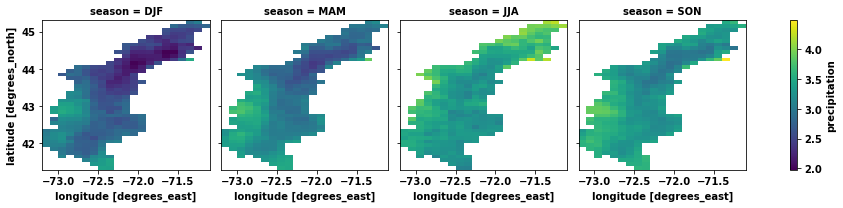

In [5]:
mswep_seasonal_mean.precipitation.plot(col="season")

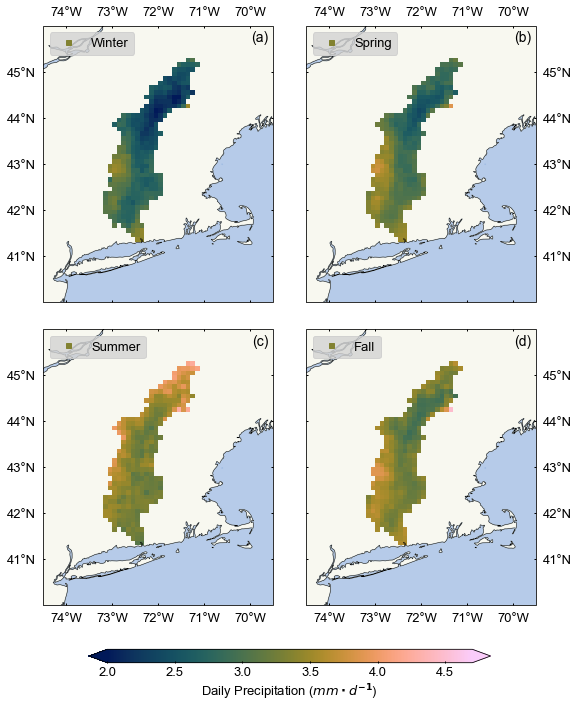

In [128]:
fig, ax_lst = plt.subplots(2, 2, figsize=(9,13.5), subplot_kw=dict(projection=ccrs.PlateCarree()), 
                           gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 13

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1.),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

#cmap=cmaps.cmocean_tempo
cmap = cm.batlow

bounds = np.array([2.,2.5,3.,3.5,4.,4.5,5.])
min_lon = -74
max_lon = -69
min_lat = 41
max_lat = 46

# Figure 1

ax_lst[0,0].set_extent([-74.5, -69.5, 40, 46])
ax_lst[0,0].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[0,0].yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = np.arange(min_lon, max_lon, 1)
lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[0,0].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[0,0].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[0,0].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[0,0].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[0,0].tick_params(labelleft=True,labelbottom=False,labeltop=True,labelright=False)  

ax_lst[0,0].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[0,0].coastlines(resolution='10m',linewidth=0.5)
#ax_lst[0,0].add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5,alpha=0.8)
ax_lst[0,0].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[0,0].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(mswep_seasonal_mean.lon,mswep_seasonal_mean.lat)

cs2 = ax_lst[0,0].pcolormesh(lon, lat, mswep_seasonal_mean.precipitation.sel(season='DJF'), vmin=2.,vmax=4.7, 
                             cmap=cmap)
#.where(notnull)
cax,kw = mpl.colorbar.make_axes(ax_lst,location='bottom',pad=0.06,aspect=30, shrink=0.8)
out=fig.colorbar(cs2, cax=cax, ticks=bounds,extend='both',**kw)
out.set_label('Daily Precipitation ($mm \cdot d^{-1}$)')
out.ax.tick_params(direction='in',size=2., width=1)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Winter',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[0,0].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 2


ax_lst[0,1].set_extent([-74.5, -69.5, 40, 46])
ax_lst[0,1].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[0,1].yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = np.arange(min_lon, max_lon, 1)
lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[0,1].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[0,1].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[0,1].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[0,1].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[0,1].tick_params(labelleft=False,labelbottom=False,labeltop=True,labelright=True)  

ax_lst[0,1].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[0,1].coastlines(resolution='10m',linewidth=0.5)
ax_lst[0,1].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[0,1].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(mswep_seasonal_mean.lon,mswep_seasonal_mean.lat)

cs2 = ax_lst[0,1].pcolormesh(lon, lat, mswep_seasonal_mean.precipitation.sel(season='MAM'), vmin=2.,vmax=4.7, 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Spring',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[0,1].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 3

ax_lst[1,0].set_extent([-74.5, -69.5, 40, 46])
ax_lst[1,0].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[1,0].yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = np.arange(min_lon, max_lon, 1)
lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[1,0].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[1,0].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[1,0].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[1,0].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[1,0].tick_params(labelleft=True,labelbottom=True,labeltop=False,labelright=False)  

ax_lst[1,0].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[1,0].coastlines(resolution='10m',linewidth=0.5)
ax_lst[1,0].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[1,0].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(mswep_seasonal_mean.lon,mswep_seasonal_mean.lat)

cs2 = ax_lst[1,0].pcolormesh(lon, lat, mswep_seasonal_mean.precipitation.sel(season='JJA'), vmin=2.,vmax=4.7, 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Summer',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[1,0].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')


# Figure 4

ax_lst[1,1].set_extent([-74.5, -69.5, 40, 46])
ax_lst[1,1].xaxis.set_major_formatter(LongitudeFormatter())
ax_lst[1,1].yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = np.arange(min_lon, max_lon, 1)
lat_ticks = np.arange(min_lat, max_lat, 1)

ax_lst[1,1].set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax_lst[1,1].set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax_lst[1,1].xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax_lst[1,1].yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax_lst[1,1].tick_params(labelleft=False,labelbottom=True,labeltop=False,labelright=True)  

ax_lst[1,1].add_feature(cfeature.LAND.with_scale('10m'), color='white', alpha=0.4)

ax_lst[1,1].coastlines(resolution='10m',linewidth=0.5)
ax_lst[1,1].add_feature(cfeature.OCEAN, alpha=0.7)
ax_lst[1,1].add_feature(cfeature.LAND, alpha=0.4)

lon, lat= np.meshgrid(mswep_seasonal_mean.lon,mswep_seasonal_mean.lat)

cs2 = ax_lst[1,1].pcolormesh(lon, lat, mswep_seasonal_mean.precipitation.sel(season='SON'), vmin=2.,vmax=4.7, 
                             cmap=cmap)

precipitation = Line2D([0], [0], marker='s', color='white', linestyle="", label='Fall',
                          markerfacecolor=cmap(0.5),markeredgecolor=cmap(0.5), markersize=5)
                  
ax_lst[1,1].legend(handles=[precipitation], loc='upper left',fontsize=13, facecolor='lightgrey')

plt.savefig('seasonal_precipitation_allyears.png', format='png', transparent=False, dpi=600, bbox_inches='tight')

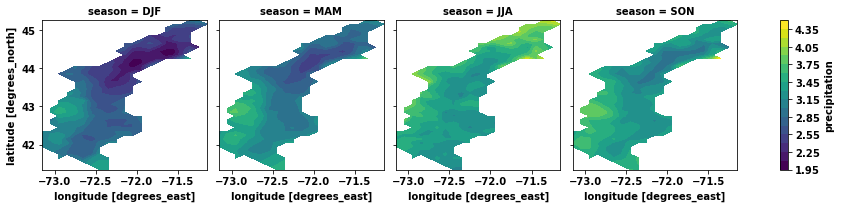

In [9]:
mswep_seasonal_mean.precipitation.plot.contourf(col="season", levels=20, add_colorbar=True)

In [3]:
ds2 = mswep_ctrb.sel(lon=-72.61, lat=41.99, method='nearest')

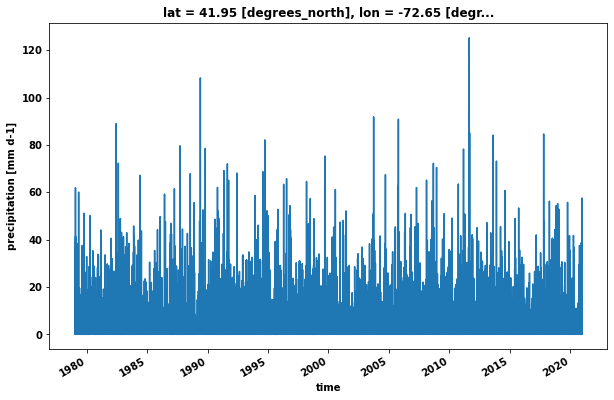

In [4]:
ds2.precipitation.plot(figsize=(10,6))

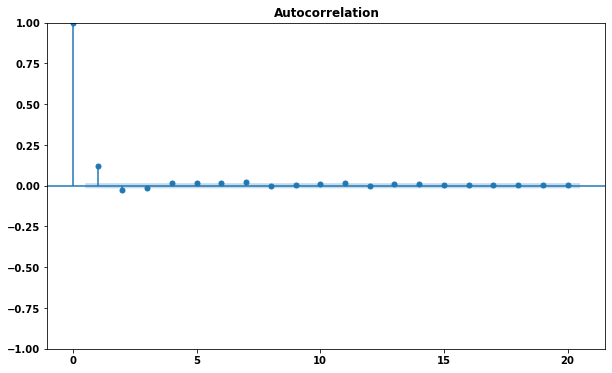

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(ds2.precipitation, lags=20, ax=ax);

In [12]:
mk.original_test(ds2.precipitation, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=0.01248264072503713, z=2.4981981248346052, Tau=0.012425346171610063, s=1461653.0, var_s=342321529757.6667, slope=0.0, intercept=0.0)

In [15]:
res = mk.seasonal_test(ds2.precipitation,period=91)

In [17]:
res.slope, res.intercept

(0.0, 0.0)

In [6]:
# import GloFAS dataset
glofas = xr.open_dataset('glofas_ct_river_basin.grib', engine='cfgrib')
glofas_ds = glofas.sel(time=slice("2001-01-01", "2021-01-01"))
ds3 = glofas_ds.sel(longitude=360-72.61, latitude=41.99, method='nearest')

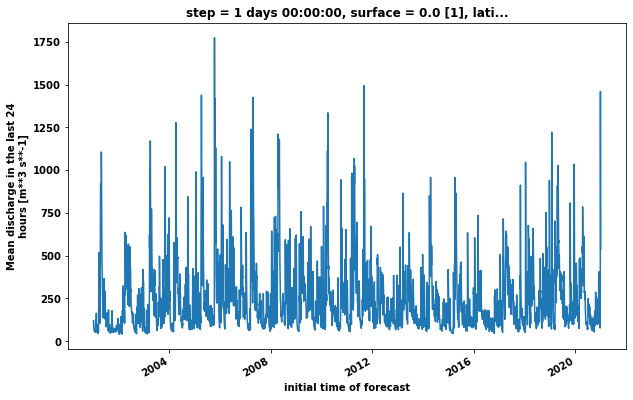

In [7]:
ds3.dis24.plot(figsize=(10,6))

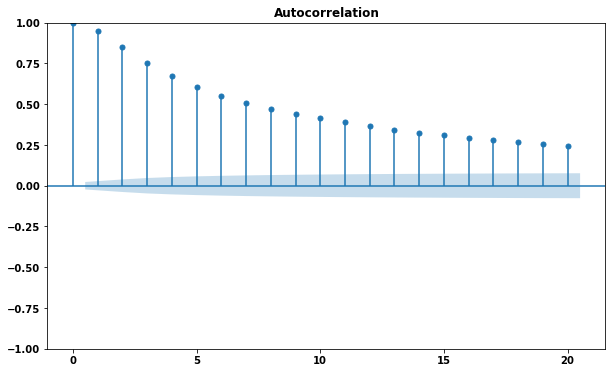

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(ds3.dis24, lags=20, ax=ax);

In [27]:
mk.hamed_rao_modification_test(ds3.dis24)

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.6742631243628168, z=0.42030436116862, Tau=0.01842325433899121, s=491493.0, var_s=1367430031774.6736, slope=0.0014366880739499254, intercept=172.69364484143486)

In [35]:
mk.seasonal_test(ds3.dis24,period=91)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.021089242367695826, z=2.3063829762361134, Tau=0.018386517474789334, s=5324.0, var_s=5326599.999999999, slope=0.12353737944969011, intercept=172.98264386606849)

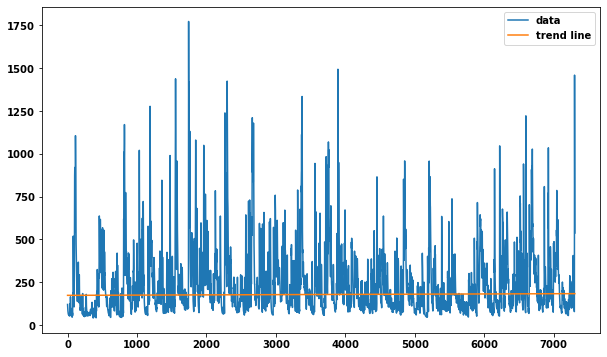

In [34]:
period=91
data = ds3.dis24

fig, ax = plt.subplots(figsize=(10, 6))
res = mk.seasonal_test(ds3.dis24,period=91)
trend_line = np.arange(len(data)) / period * res.slope + res.intercept

ax.plot(data)
ax.plot(trend_line)
ax.legend(['data', 'trend line'])

In [37]:
trend_line.min()

172.98264386606849